In [7]:
import numpy as np
import matplotlib.pyplot as plt

# https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction/data
# Load data
data = np.loadtxt(
    './Housing.csv',
    delimiter=',',
    skiprows=1,
    dtype=[
        ('price', 'float'),
        ('area', 'float'),
        ('bedrooms', 'float'),
        ('bathrooms', 'float'),
        ('stories', 'float'),
        ('mainroad', 'U3'),
        ('guestroom', 'U3'),
        ('basement', 'U3'),
        ('hotwaterheating', 'U3'),
        ('airconditioning', 'U3'),
        ('parking', 'float'),
        ('prefarea', 'U3'),
        ('furnishingstatus', 'U30')
    ]
)

In [8]:
data[0]

(13300000., 7420., 4., 2., 3., 'yes', 'no', 'no', 'no', 'yes', 2., 'yes', 'furnished')

In [183]:
encode = lambda x, string: 1. if x == string else 0.
encode_yes_no = lambda x: encode(x, 'yes')
encode_furnish_none = lambda x: encode(x, 'unfurnished')
encode_furnish_semi = lambda x: encode(x, 'semi-furnished')
encode_furnish_full = lambda x: encode(x, 'furnished')

def convert_data(raw_data):
    x_train = []
    y_train = []
    price_index = 0

    for house in raw_data:
        (
            price,
            area,
            bedrooms,
            bathrooms,
            stories,
            mainroad,
            guestroom,
            basement,
            hotwaterheating,
            airconditioning,
            parking,
            prefarea,
            furnishingstatus
        ) = house

        # price (millions)
        price /= 1e6

        # area (thousands of square feet)
        area /= 1e3
        
        y_train.append(price)
        mainroad = encode_yes_no(mainroad)
        guestroom = encode_yes_no(guestroom)
        basement = encode_yes_no(basement)
        hotwaterheating = encode_yes_no(hotwaterheating)
        airconditioning = encode_yes_no(airconditioning)
        prefarea = encode_yes_no(prefarea)

        # Perform one-hot encoding for features with more than 2 values
        furnish_none = encode_furnish_none(furnishingstatus)
        furnish_semi = encode_furnish_semi(furnishingstatus)
        furnish_full = encode_furnish_full(furnishingstatus)

        x_train.append([
            area,
            bedrooms,
            bathrooms,
            stories,
            mainroad,
            guestroom,
            basement,
            hotwaterheating,
            airconditioning,
            parking,
            prefarea,
            furnish_none,
            furnish_semi,
            furnish_full,
        ])
        

    return np.array(x_train), np.array(y_train)
    

In [184]:
x_train, y_train = convert_data(data)
for i in range(5):
    print(x_train[i])

[7.42 4.   2.   3.   1.   0.   0.   0.   1.   2.   1.   0.   0.   1.  ]
[8.96 4.   4.   4.   1.   0.   0.   0.   1.   3.   0.   0.   0.   1.  ]
[9.96 3.   2.   2.   1.   0.   1.   0.   0.   2.   1.   0.   1.   0.  ]
[7.5 4.  2.  2.  1.  0.  1.  0.  1.  3.  1.  0.  0.  1. ]
[7.42 4.   1.   2.   1.   1.   1.   0.   1.   2.   0.   0.   0.   1.  ]


In [185]:
from sklearn.linear_model import SGDRegressor
skx_norm=x_train

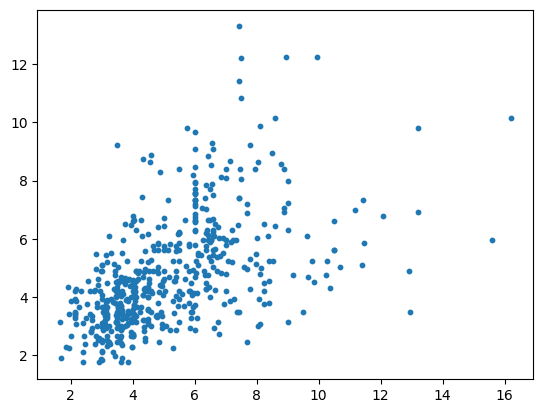

In [186]:
# Visualize some relationships
fig, ax = plt.subplots()

x_area = skx_norm[:, 0]
ax.scatter(x_area, y_train, s=10)

In [187]:
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(skx_norm, y_train)
print(sgdr)
print(f"Iterations: {sgdr.n_iter_}, Weights updated: {sgdr.t_}")

SGDRegressor(max_iter=10000)
Iterations: 20, Weights updated: 10901.0


In [188]:
b_norm = sgdr.intercept_[0]
w_norm = sgdr.coef_
print(f"w: {w_norm}, b:{b_norm}")

w: [ 0.22738173  0.09301871  0.9471061   0.4705371   0.34130035  0.30722762
  0.38550997  0.35720572  0.79001348  0.29495513  0.5977593  -0.27483064
  0.11994655  0.17498535], b:0.02018067744360014


In [189]:
y_pred = []

for i in range(len(x_train)):
    y_pred.append(w_norm @ x_train[i] + b_norm)

Text(0, 0.5, 'Price (millions)')

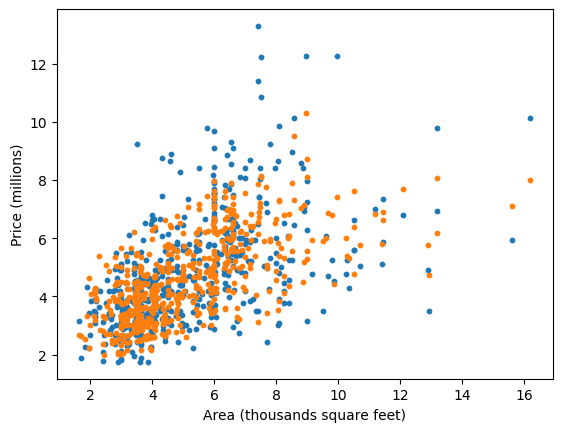

In [197]:

# Visualize some relationships
fig, ax = plt.subplots()

x_area = skx_norm[:, 0]
ax.scatter(x_area, y_train, s=10)
ax.scatter(x_area, y_pred, s=10)
ax.set_xlabel('Area (thousands square feet)')
ax.set_ylabel('Price (millions)')

The linear model catches the most populated area very well, but does poorly for outliers.